In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_addons as tfa
from tensorflow import keras

from lib.utils import *
from src.config import c
from src.data_utils import (
    boost_multiple_occurences,
    geofilter_predictions,
    normalize_soundscapes_df,
    predictions_to_text_labels,
)
from src.generator import Generator
from src.geo_filter import filters as geo_filters
from src.kaggle_utils import predict
from src.services import get_msg_provider, get_wave_provider

In [184]:
wave_p = get_wave_provider(c)

In [185]:
msg_p = get_msg_provider(c)

In [186]:
df = pd.read_pickle("/app/_work/dataset-F.pickle")

In [187]:
F = df.sample(n=1).filename.iloc[0]

In [188]:
x = wave_p.get_audio_fragment(F, [0, 5])

In [189]:
m = msg_p.msg(x, 256, 256, 3)
m = float2d_to_rgb(m)

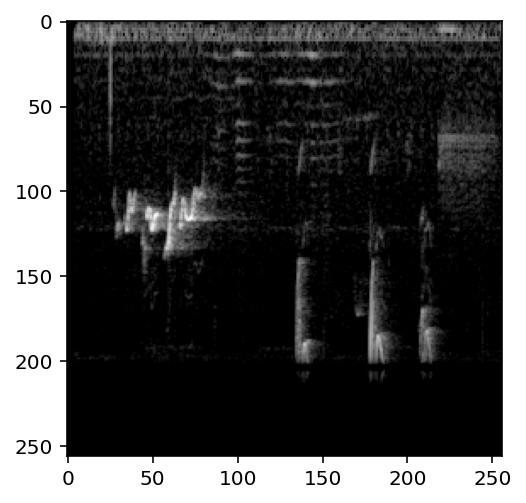

In [190]:
plt.imshow(m)

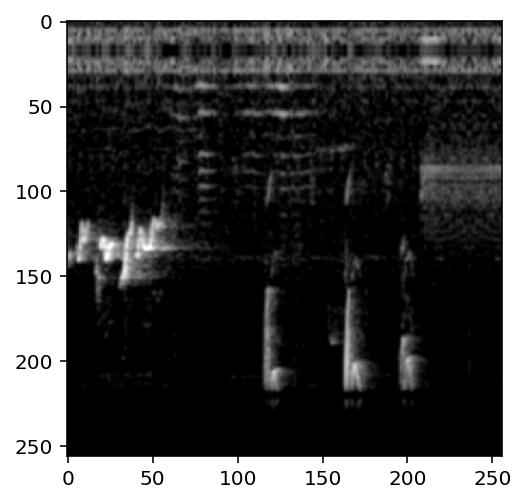

In [199]:
m2 = keras.layers.experimental.preprocessing.RandomZoom(
    height_factor=(-0.1, 0.1),
    width_factor=(-0.1, 0.1),
    fill_mode="reflect",
)(m[np.newaxis, ...])

m2 = keras.layers.experimental.preprocessing.RandomTranslation(
    height_factor=(-0.1, 0.1),
    width_factor=(-0.1, 0.1),
    fill_mode="reflect",
)(m2)

m2 = keras.layers.experimental.preprocessing.RandomContrast(
    factor=0.25,
)(m2)


plt.imshow(m2.numpy()[0])

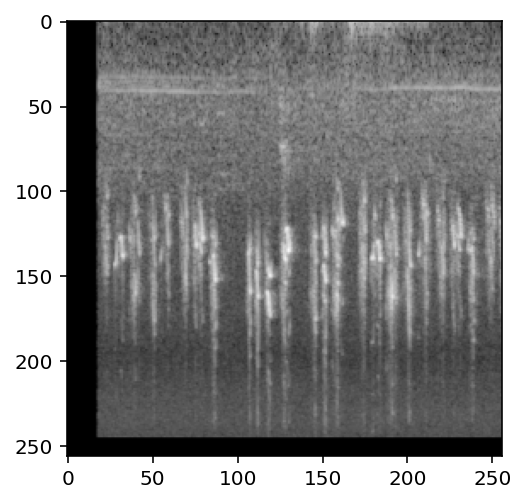

In [167]:
m2 = keras.layers.experimental.preprocessing.RandomTranslation(
    height_factor=(-0.1, 0.1),
    width_factor=(-0.1, 0.1),
    fill_mode="constant",
)(m[np.newaxis, ...])

plt.imshow(m2.numpy()[0])